In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/auto.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset = dataset.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'curb-weight', 'engine-type', 'num-of-cylinders', ' engine-size', 'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg'], axis=1)

In [ ]:
dataset

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,5400,16845
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,5300,19045
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,5500,21485
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,4800,22470


In [ ]:
dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values() 

wheel-base           0
length               0
width                0
height               0
compression-ratio    0
peak-rpm             2
bore                 4
stroke               4
price                4
dtype: int64

In [ ]:
avg_bore = dataset['bore'].astype('float').mean(axis=0)
avg_stroke = dataset['stroke'].astype('float').mean(axis=0)
avg_peak_rpm = dataset['peak-rpm'].astype('float').mean(axis=0)

In [ ]:
dataset['bore'].replace(np.nan, avg_bore, inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)
dataset.dropna(subset=["price"], axis=0, inplace=True)

dataset.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    object 
 5   stroke             201 non-null    object 
 6   compression-ratio  201 non-null    float64
 7   peak-rpm           201 non-null    object 
 8   price              201 non-null    object 
dtypes: float64(5), object(4)
memory usage: 15.7+ KB


In [ ]:
dataset = dataset.astype('float')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    float64
 5   stroke             201 non-null    float64
 6   compression-ratio  201 non-null    float64
 7   peak-rpm           201 non-null    float64
 8   price              201 non-null    float64
dtypes: float64(9)
memory usage: 15.7 KB


In [ ]:
dataset.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500.0,17450.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1028e80a20>,
      dtype=object)

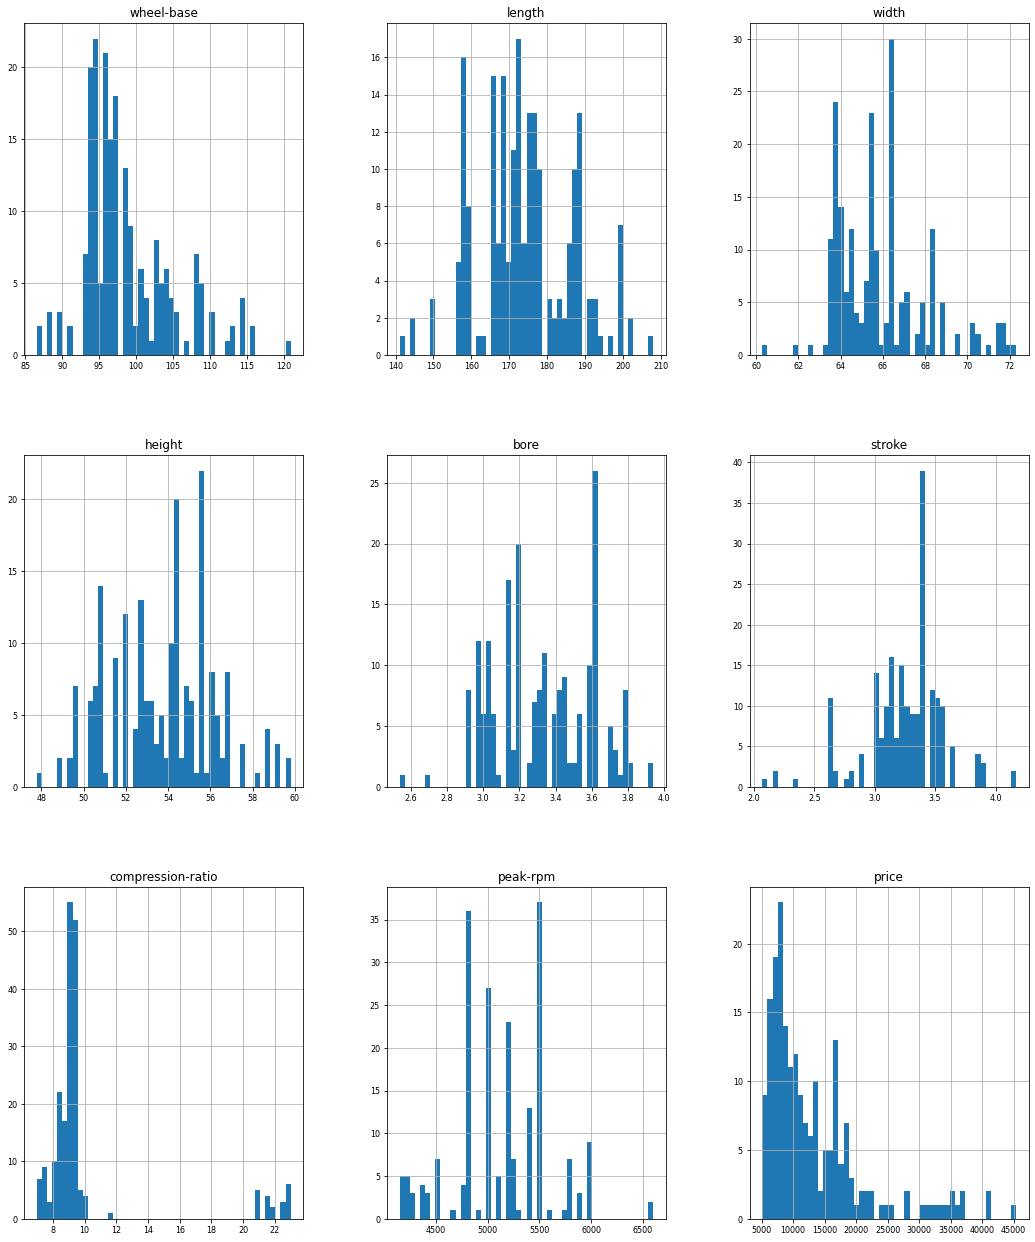

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

corr

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.493244,0.158018,0.250313,-0.360305,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.608971,0.123952,0.159733,-0.285970,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.544885,0.188822,0.189867,-0.245800,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.180449,-0.060663,0.259737,-0.309974,0.135486
bore,0.493244,0.608971,0.544885,0.180449,1.000000,-0.055390,0.001263,-0.267392,0.543155
stroke,0.158018,0.123952,0.188822,-0.060663,-0.055390,1.000000,0.187871,-0.063561,0.082269
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.001263,0.187871,1.000000,-0.435780,0.071107
peak-rpm,-0.360305,-0.285970,-0.245800,-0.309974,-0.267392,-0.063561,-0.435780,1.000000,-0.101616
price,0.584642,0.690628,0.751265,0.135486,0.543155,0.082269,0.071107,-0.101616,1.000000


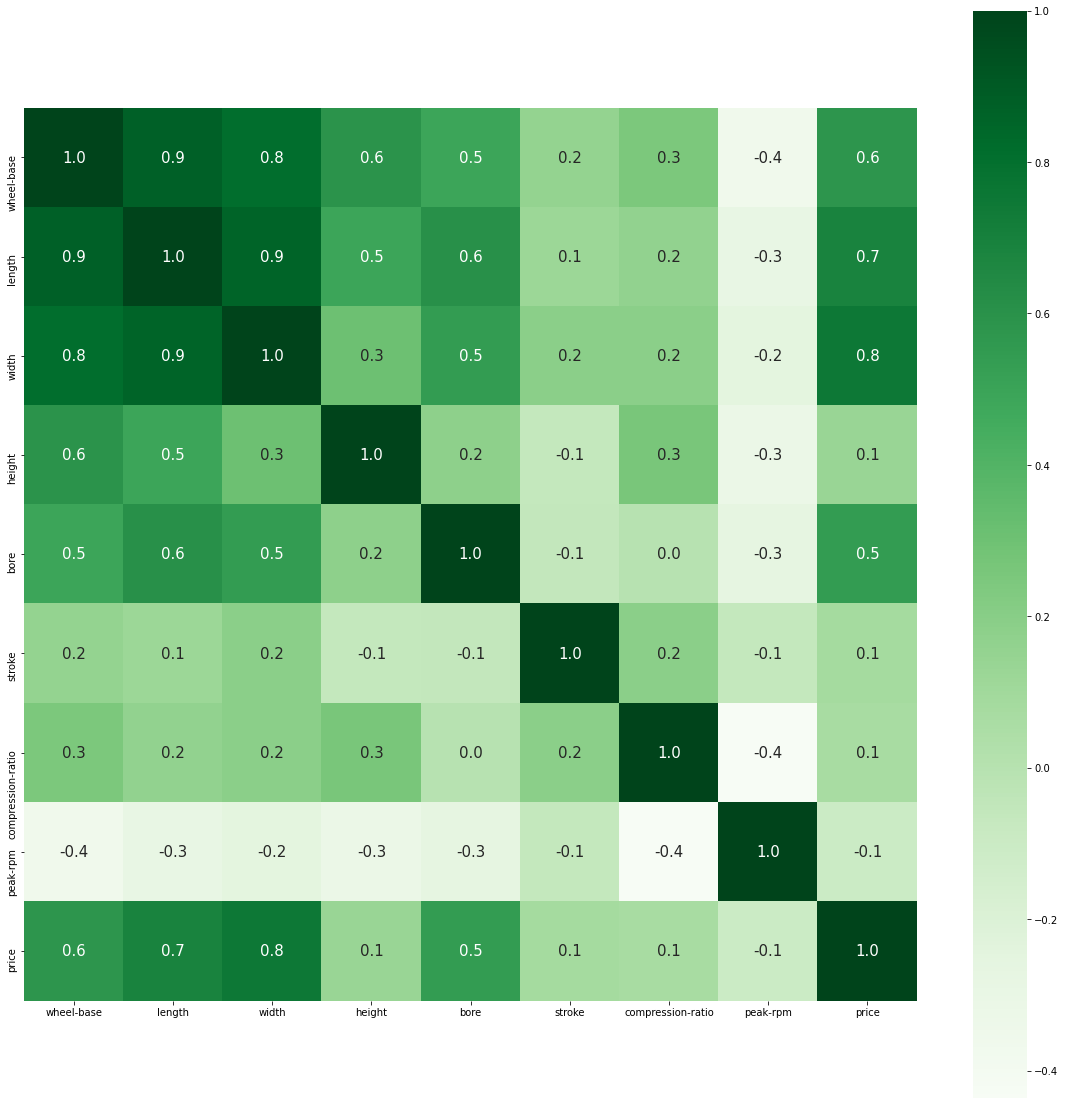

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.244769250439587
MAE (Mean Absolute Error) 0.37372756360580484
r^2 score 0.6582019578480833
RMSE (Root Mean Squared Error 0.49474159966550924


# Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 1.0687 - val_loss: 0.7035
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0393 - val_loss: 0.6829
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9994 - val_loss: 0.6549
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9403 - val_loss: 0.6183
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8710 - val_loss: 0.5788
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7891 - val_loss: 0.5478
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7219 - val_loss: 0.5240
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6584 - val_loss: 0.5082
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6099 - val_loss: 0.4997
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5644 - val_loss: 0.4928
Epoch 11/50
20/20 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.27831778667973495
MAE (Mean Absolute Error) 0.38535826449222405
r^2 score 0.6113544719675994
RMSE (Root Mean Squared Error 0.5275583253818813


# Deeper

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0714 - val_loss: 0.7201
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0682 - val_loss: 0.7165
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0585 - val_loss: 0.7059
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0339 - val_loss: 0.6806
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9794 - val_loss: 0.6332
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8931 - val_loss: 0.5678
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7789 - val_loss: 0.5090
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6729 - val_loss: 0.4697
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5857 - val_loss: 0.4429
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.4289
Epoch 11/50
20/20 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.18171028760431063
MAE (Mean Absolute Error) 0.29505980938475784
r^2 score 0.7462580760023025
RMSE (Root Mean Squared Error 0.42627489675596736


# Wider

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0381 - val_loss: 0.6926
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9812 - val_loss: 0.6643
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9040 - val_loss: 0.6221
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8061 - val_loss: 0.5756
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7074 - val_loss: 0.5342
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6026 - val_loss: 0.5046
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5263 - val_loss: 0.4849
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4861 - val_loss: 0.4791
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4542 - val_loss: 0.4619
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4378 - val_loss: 0.4473
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.19439008652700407
MAE (Mean Absolute Error) 0.3302979115078787
r^2 score 0.7285518876682974
RMSE (Root Mean Squared Error 0.44089691145096954


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,1.038119,0.692586,0
1,0.981221,0.664282,1
2,0.904010,0.622106,2
3,0.806108,0.575636,3
4,0.707426,0.534243,4
...,...,...,...
95,0.177097,0.194857,95
96,0.174748,0.194338,96
97,0.177167,0.196029,97
98,0.178241,0.194453,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
70,0.200917,0.192677,70
78,0.191307,0.192932,78
69,0.202579,0.193066,69
76,0.192664,0.193386,76
74,0.196684,0.193457,74
...,...,...,...
4,0.707426,0.534243,4
3,0.806108,0.575636,3
2,0.904010,0.622106,2
1,0.981221,0.664282,1


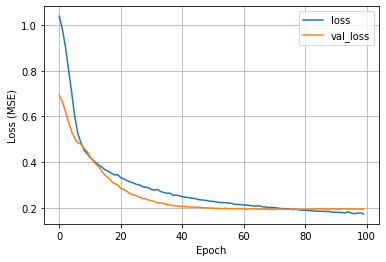

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 1.0367 - val_loss: 0.6804
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9782 - val_loss: 0.6500
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9022 - val_loss: 0.6083
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7930 - val_loss: 0.5572
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6827 - val_loss: 0.5058
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5705 - val_loss: 0.4636
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5129 - val_loss: 0.4368
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4593 - val_loss: 0.4130
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4329 - val_loss: 0.3904
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4162 - val_loss: 0.3739
Epoch 11/

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
97,0.171778,0.160365,97
95,0.171526,0.160836,95
94,0.176399,0.160986,94
98,0.170756,0.161076,98
88,0.179553,0.161572,88
...,...,...,...
4,0.682664,0.505806,4
3,0.793033,0.557213,3
2,0.902166,0.608312,2
1,0.978177,0.649960,1


In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.16298114278957532
MAE (Mean Absolute Error) 0.3048393263571579
r^2 score 0.772411626815403
RMSE (Root Mean Squared Error 0.4037092304983567


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0327 - val_loss: 0.6824
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9674 - val_loss: 0.6451
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8884 - val_loss: 0.6007
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8019 - val_loss: 0.5581
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7166 - val_loss: 0.5177
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6437 - val_loss: 0.4865
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5800 - val_loss: 0.4626
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.4481
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4997 - val_loss: 0.4363
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4737 - val_loss: 0.4255
Epoch 11/

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
97,0.171977,0.166167,97
85,0.185473,0.166586,85
98,0.171758,0.166640,98
96,0.174804,0.166713,96
99,0.169844,0.167203,99
...,...,...,...
4,0.716579,0.517734,4
3,0.801910,0.558086,3
2,0.888449,0.600687,2
1,0.967374,0.645115,1


In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.16720308072403717
MAE (Mean Absolute Error) 0.30332369324298497
r^2 score 0.7665160736873269
RMSE (Root Mean Squared Error 0.40890473306631847


Untuk Data Auto model terbaik yaitu Wider Model menggunakan SGD dengan nilai r2 score 0.772